***
# EDA emotions_with_neutrals_220228.csv dataset
Concatenated the neutrals from Kaggle dataset with Huggingface dataset<br>
https://github.com/dair-ai/emotion_dataset<br>
https://huggingface.co/datasets/dair-ai/emotion
***

***
## 1 Load the dataset
 <span style="color:red">!!!Make sure to comment out the correct source (Google drive or local)!!!</span>

In [1]:
import pandas as pd
import numpy as np
import random

from google.colab import drive 
drive.mount('/content/gdrive')

project_folder = '/content/gdrive/MyDrive/266_Final_Project_Folder'

# read from the google drive
source = project_folder + '/datasets/emotions_with_neutrals_220228.csv'

# Load the pickled DataFrame
df = pd.read_csv(source)

print(df.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Unnamed: 0                                               text emotions
0       27383  i feel awful about it too because it s my job ...  sadness
1      110083                              im alone i feel awful  sadness
2      140764  ive probably mentioned this before but i reall...      joy
3      100071           i was feeling a little low few days back  sadness
4        2837  i beleive that i am much more sensitive to oth...     love


***
## 2 Basic EDA

### Datatypes for each of the columns in our dataframe

In [2]:
print(df.dtypes)

Unnamed: 0     int64
text          object
emotions      object
dtype: object


### Unique types and count of sentiments in the dataset

In [3]:
def get_proportions(data):
  # get the value counts of each unique value
  counts = data.value_counts()

  # convert the counts to percentages
  percentages = counts / counts.sum() * 100

  return pd.DataFrame({'count': counts, 'percentage': percentages})  

In [4]:
cp_df = get_proportions(df['emotions'])
print(cp_df)

           count  percentage
joy       141067   33.157362
sadness   121187   28.484629
anger      57317   13.472183
fear       47712   11.214558
love       34554    8.121811
surprise   14972    3.519122
neutral     8638    2.030335


### Max and min lengths of words in the text

In [5]:
import statistics

# Apply the lambda function to the 'content' column and list called word_count_list'
word_count_list = list(df['text'].apply(lambda x: len(x.split(' '))))

# display the maximum and minimum lengths
print('Maximum word length:', max(word_count_list))
print('Minimum word length:', min(word_count_list))
print('Mean word length:', statistics.mean(word_count_list))
print('Median word length:', statistics.median(word_count_list))
print('75th percentile word length:', np.percentile(word_count_list, 75))
print('85th percentile word length:', np.percentile(word_count_list, 85))
print('95th percentile word length:', np.percentile(word_count_list, 95))

Maximum word length: 178
Minimum word length: 1
Mean word length: 19.058693562300355
Median word length: 17
75th percentile word length: 25.0
85th percentile word length: 30.0
95th percentile word length: 41.0


(array([2.0860e+03, 2.1312e+04, 3.1886e+04, 3.3226e+04, 3.4129e+04,
        3.4441e+04, 3.3288e+04, 3.1458e+04, 2.9109e+04, 2.6666e+04,
        2.3666e+04, 2.0754e+04, 2.5957e+04, 1.3887e+04, 1.1442e+04,
        9.7050e+03, 8.0990e+03, 6.6180e+03, 5.5650e+03, 4.6280e+03,
        3.7870e+03, 3.1830e+03, 2.5530e+03, 2.1370e+03, 2.5210e+03,
        1.2620e+03, 8.8100e+02, 5.4200e+02, 3.4200e+02, 1.7100e+02,
        7.4000e+01, 3.3000e+01, 1.8000e+01, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

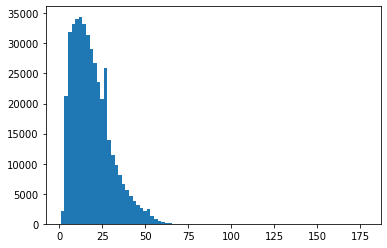

In [6]:
import matplotlib.pyplot as plt

plt.hist(word_count_list, bins=len(set(word_count_list)))

***
## 3 Split dataset into test/train/validation (imbalanced using stratify)

### Drop tweet_id column

In [7]:
df = df.drop(columns='Unnamed: 0')
print(df.dtypes)

text        object
emotions    object
dtype: object


### Split the dataset: test = 30%, train = 70% then split train: train = 75% of initial train, validation = 25% of initial train. Stratifying the dataset to keep proportions.

In [8]:
from sklearn.model_selection import train_test_split
# Split original dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotions'],
                                                    test_size=0.3,
                                                    stratify=df['emotions'],
                                                    random_state=11)

# Split train set into train (75%) and validation (25%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.25,
                                                  stratify=y_train,
                                                  random_state=11)

### Check to see if splits are correct

In [9]:
print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('X_val:', len(X_val))

print('X_train prop:', len(X_train) / len(df))
print('X_test prop:', len(X_test) / len(df))
print('X_val prop:', len(X_val) / len(df))

X_train: 223359
X_test: 127635
X_val: 74453
X_train prop: 0.5249984134334006
X_test prop: 0.3000021154221325
X_val prop: 0.17499947114446687


### Check to see if the proportions of each class are still the same

In [10]:
# reminder of proportions of original df
print(cp_df)

           count  percentage
joy       141067   33.157362
sadness   121187   28.484629
anger      57317   13.472183
fear       47712   11.214558
love       34554    8.121811
surprise   14972    3.519122
neutral     8638    2.030335


In [11]:
y_train_proportions = get_proportions(y_train)
print(y_train_proportions)

          count  percentage
joy       74060   33.157383
sadness   63623   28.484637
anger     30092   13.472482
fear      25048   11.214234
love      18141    8.121902
surprise   7860    3.518999
neutral    4535    2.030364


In [12]:
y_test_proportions = get_proportions(y_test)
print(y_test_proportions)

          count  percentage
joy       42320   33.157049
sadness   36356   28.484350
anger     17195   13.472010
fear      14314   11.214792
love      10366    8.121597
surprise   4492    3.519411
neutral    2592    2.030791


In [13]:
y_val_proportions = get_proportions(y_val)
print(y_val_proportions)

          count  percentage
joy       24687   33.157831
sadness   21208   28.485085
anger     10030   13.471586
fear       8350   11.215129
love       6047    8.121902
surprise   2620    3.518999
neutral    1511    2.029468


In [14]:
print('yay!!')

yay!!


### Make csv of train, test, validation datasets

#### Commenting out because I've already created the test_df

In [16]:
train_df = pd.DataFrame({'text': X_train, 'emotions': y_train})
train_df.to_csv(project_folder + '/datasets/train_data_imbalanced_stratified.csv')

In [17]:
test_df = pd.DataFrame({'text': X_test, 'emotions': y_test})
test_df.to_csv(project_folder + '/datasets/test_data_imbalanced_stratified.csv')

In [18]:
val_df = pd.DataFrame({'text': X_val, 'emotions': y_val})
val_df.to_csv(project_folder + '/datasets/validation_data_imbalanced_stratified.csv')

#### Make a balanced test set from the existing test_df set

In [19]:
# used 2592 because the smallest number in the test_df
balanced_test_df = test_df.groupby('emotions').sample(n=2592, random_state=11)
balanced_test_df

,text,emotions
219222,i just feel greedy daydreaming about hats and ...,anger
389639,i cant be bothered to talk about the weather t...,anger
251952,i feel infuriated that i have to say to a prof...,anger
396969,i feel distracted isolated,anger
159585,i give myself completely to my child my partne...,anger
...,...,...
87815,i feel really overwhelmed with mine,surprise
413773,i used to blog pretty regularly and i feel kin...,surprise
289887,i feel in retrospect if i have the ability to ...,surprise
11559,im thrilled to report that ive been feeling am...,surprise


In [23]:
# verify that the balanced_test_df is actually balanced
print(get_proportions(balanced_test_df['emotions']))

          count  percentage
anger      2592   14.285714
fear       2592   14.285714
joy        2592   14.285714
love       2592   14.285714
neutral    2592   14.285714
sadness    2592   14.285714
surprise   2592   14.285714


In [24]:
# write to CSV
balanced_test_df.to_csv(project_folder + '/datasets/test_data_balanced.csv')